In [3]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Add the path to the electre_tree module to the Python path
sys.path.append(os.path.join(cwd, 'ELECTRE_Tree'))

from electre_tree import tree_e_tri_b , util_e_tri_b

In [4]:
# Load subset
df = pd.read_csv('/project/grouped_shanti.csv')
df.head(3)

,geometry,Storefront,Visible Sign of Business,Business WiFi,Business tables,Business Plugs,Business Internal CCTV,External CCTV,Number of female employees,Accepts credit card,...,vehicle abandoned,Coffee Shop,Food joint,Ice Cream Shop,Lighting Stores,Restaurant,Open-Weekdays,Open-Weekends,crosswalk,Street Lighting
0,POLYGON ((483895.66276413255 2147977.512360937...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0
1,"POLYGON ((483983.9277624834 2148086.839068036,...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,POLYGON ((484015.58641704504 2148025.338677514...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,...,0.0,0.5,0.0,0.5,0.0,0.0,1.0,0.5,0.000000,0.0


In [5]:
df= df.drop(['geometry'], axis=1)

In [6]:
non_binary_columns = [col for col in df.columns if df[col].nunique() > 2]
non_binary_columns

['Business WiFi',
 'External CCTV',
 'Number of female employees',
 'Accepts credit card',
 'Incline',
 'Width',
 'Ramp conditions',
 'Ramp // Crosswalk',
 'Ramp obstacles',
 'Crosswalk width',
 'Vertical signs',
 'Crossing length',
 'Access to people with disabilities',
 'Pedestrian strip width',
 'Status of maintenance',
 'Continuity',
 'Temporary obstacles',
 'Benches',
 'Trees',
 'Planters',
 'Percentage of parking accesses',
 'Broken public property',
 'mobile vendors',
 'risky building',
 'Coffee Shop',
 'Food joint',
 'Lighting Stores',
 'Restaurant',
 'Open-Weekdays',
 'Open-Weekends',
 'crosswalk',
 'Street Lighting']

In [7]:
n_scaler = MinMaxScaler()

# Create a copy of DataFrame
df_normalized = df.copy()

df_normalized[non_binary_columns] = n_scaler.fit_transform(df_normalized[non_binary_columns])

In [8]:
# Reverse the scale of the minimization criteria by subtracting from 1
minimization_criteria = ['Incline','Ramp obstacles','Broken public property', 
                         'Incivility', 'Obstacles','Physical aspects in poor condition', 
                         'Poor infrastructure','Broken drain-cover', 'Drug addicts',
                        'Vandalism', 'graffiti','homelessness', 'inclined ramp', 'police presence', 
                         'risky building', 'risky pavement','risky road','trash', 
                         'vehicle abandoned']

df_normalized[minimization_criteria] = 1 - df_normalized[minimization_criteria]

In [10]:
# Convert to array format

arr = df_normalized.values
arr

array([[0.        , 0.        , 0.        , ..., 0.        , 0.77777778,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 10

# Parameters - GA
elite       = 30
eta         = 1
mu          = 2
size        = 60
rate        = 0.05
generations = 150
samples     = 0.10

In [14]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(arr, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         population_size = size, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [15]:
# Predict
prediction, solutions = tree_e_tri_b.predict(models, arr, verbose = True, rule = rule)

a1 = 2
a2 = 2
a3 = 2
a4 = 2
a5 = 2
a6 = 2
a7 = 2
a8 = 2
a9 = 2
a10 = 2
a11 = 2
a12 = 2
a13 = 2
a14 = 2
a15 = 2
a16 = 2
a17 = 2
a18 = 2
a19 = 2
a20 = 2
a21 = 2
a22 = 2
a23 = 2
a24 = 2
a25 = 2
a26 = 2
a27 = 2
a28 = 2
a29 = 2
a30 = 2
a31 = 2
a32 = 2
a33 = 2
a34 = 2
a35 = 2
a36 = 2
a37 = 2
a38 = 2
a39 = 2
a40 = 2
a41 = 2
a42 = 2
a43 = 2
a44 = 2
a45 = 2
a46 = 2
a47 = 2
a48 = 2
a49 = 2
a50 = 2
a51 = 2
a52 = 2
a53 = 2
a54 = 2
a55 = 2
a56 = 2
a57 = 2
a58 = 2
a59 = 2
a60 = 2
a61 = 2
a62 = 2
a63 = 2
a64 = 2
a65 = 2
a66 = 2
a67 = 2
a68 = 2
a69 = 2
a70 = 2
a71 = 2
a72 = 2
a73 = 2
a74 = 2
a75 = 2
a76 = 2
a77 = 2
a78 = 2
a79 = 2
a80 = 2
a81 = 2
a82 = 2
a83 = 2
a84 = 2
a85 = 2
a86 = 2
a87 = 2
a88 = 2
a89 = 2
a90 = 2
a91 = 2
a92 = 2
a93 = 2
a94 = 2
a95 = 2
a96 = 2
a97 = 2
a98 = 2
a99 = 2
a100 = 2
a101 = 2
a102 = 2
a103 = 2
a104 = 2
a105 = 2
a106 = 2
a107 = 2
a108 = 2
a109 = 2
a110 = 2
a111 = 2
a112 = 2
a113 = 2
a114 = 2
a115 = 2
a116 = 2
a117 = 2
a118 = 2
a119 = 2
a120 = 2
a121 = 2
a122 = 2
a123 = 2
a

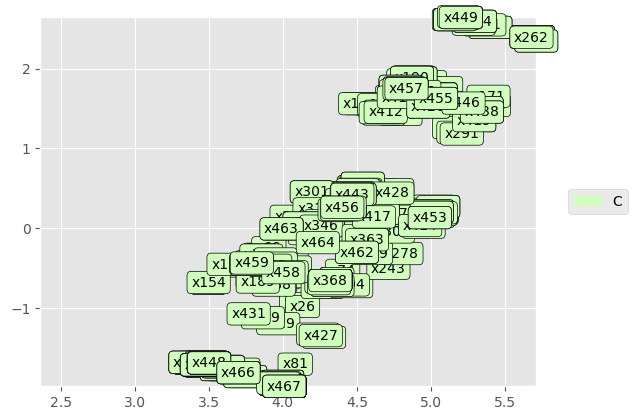

In [16]:
util_e_tri_b.plot_points(arr, prediction)

In [17]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

/project/ELECTRE_Tree/electre_tree/tree_e_tri_b.py:252: RuntimeWarning: invalid value encountered in double_scalars
  std_features[i]    = (std_features[i]/(count_features[i]-1))**(1/2)
/project/ELECTRE_Tree/electre_tree/tree_e_tri_b.py:253: RuntimeWarning: invalid value encountered in double_scalars
  q_tresholds_std[i] = (q_tresholds_std[i]/(count_features[i]-1))**(1/2)
/project/ELECTRE_Tree/electre_tree/tree_e_tri_b.py:254: RuntimeWarning: invalid value encountered in double_scalars
  p_tresholds_std[i] = (p_tresholds_std[i]/(count_features[i]-1))**(1/2)
/project/ELECTRE_Tree/electre_tree/tree_e_tri_b.py:255: RuntimeWarning: invalid value encountered in double_scalars
  v_tresholds_std[i] = (v_tresholds_std[i]/(count_features[i]-1))**(1/2)


ZeroDivisionError: float division by zero